In [1]:
import numpy
import PIL
import os
import sys
import torch
import matplotlib.pyplot as plt

# Static Scenes

In [2]:
from datasets.static_dataset import MVStaticDataset

training_data = MVStaticDataset("dtu", "scan24", "/home/stefano/Data/permuto_sdf_data/data_DTU/dtu_scan24", split="train")
test_data = MVStaticDataset("dtu", "scan24", "/home/stefano/Data/permuto_sdf_data/data_DTU/dtu_scan24", split="test")

Loading train data


Loading images:   0%|          | 0/49 [00:00<?, ?it/s]

Loading masks: 100%|██████████| 49/49 [00:01<00:00, 42.91it/s]


Loaded 42 cameras
Loading test data


Loading masks: 100%|██████████| 49/49 [00:01<00:00, 46.82it/s]


Loaded 7 cameras


In [3]:
training_data.cameras[0].transform

tensor([[ 0.9472, -0.0938, -0.3065,  2.3849],
        [-0.0938,  0.8332, -0.5450,  0.5773],
        [ 0.3065,  0.5450,  0.7804, -0.4238],
        [ 0.0000,  0.0000,  0.0000,  1.0000]])

In [5]:
# dataloader
train_dataloader = torch.utils.data.DataLoader(training_data, batch_size=1, shuffle=False, num_workers=0)
test_dataloader = torch.utils.data.DataLoader(test_data, batch_size=1, shuffle=False, num_workers=0)

In [6]:
data = next(iter(train_dataloader))
intrinsics = data[0]
pose = data[1]
img = data[2]
mask = data[3]

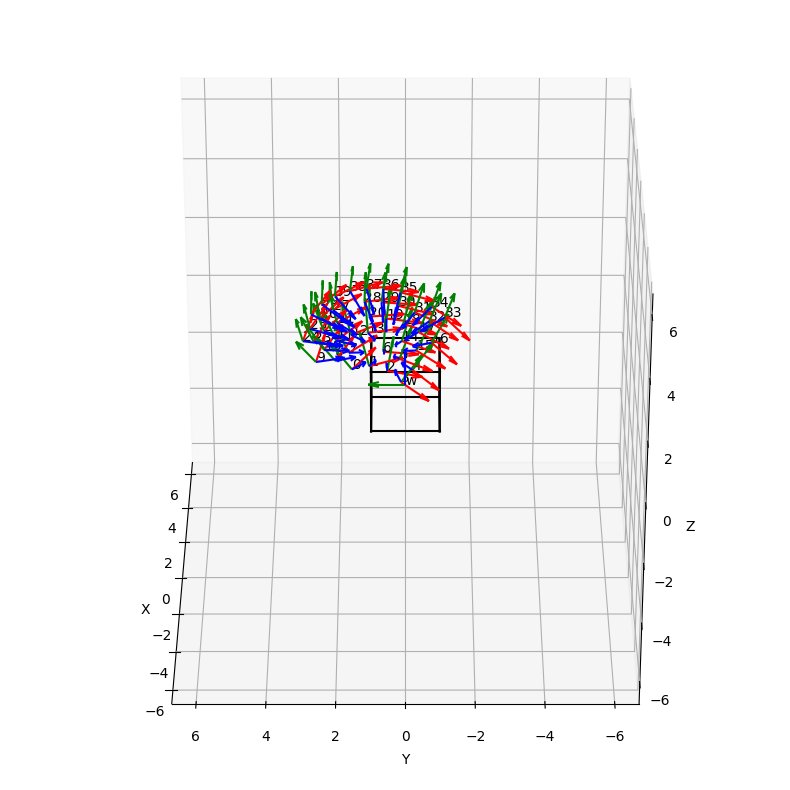

In [11]:
from datasets.visualization.matplotlib import plot_cameras

#import ipywidgets as widgets
# from IPython.display import display

# @widgets.interact(angle=(0, 360))
# def f(angle=5):
plot_cameras(training_data.cameras, azimuth_deg=60, elevation_deg=30)

# Dynamic Scenes

In [6]:
from datasets.loaders.pac_nerf import load_data

In [7]:
data_path = "/home/stefano/Data/pac_nerf_data/bird"
c2w_all, K_all, rgb_all = load_data(data_path)

  0%|          | 0/165 [00:00<?, ?it/s]

100%|██████████| 165/165 [00:06<00:00, 24.93it/s]


In [8]:
c2w_all.shape

torch.Size([11, 3, 4])

In [9]:
c2w_all[:, :3, 3]

tensor([[-0.3395,  0.8731, -2.8500],
        [ 1.1836,  1.9485, -1.9500],
        [-2.1594,  1.5858, -1.3500],
        [ 2.7938,  0.3035, -1.0500],
        [-0.0613,  2.9654, -0.4500],
        [-2.9896,  0.2002,  0.1500],
        [ 2.3161,  1.8529,  0.4500],
        [-1.5570,  2.3395,  1.0500],
        [ 0.7376,  2.1572,  1.9500],
        [-1.4449,  0.6401,  2.5500],
        [ 0.8878,  0.2988,  2.8500]])

In [10]:
rgb_all.shape

torch.Size([11, 14, 800, 800, 3])

In [11]:
rgb_all[:, 0].shape

torch.Size([11, 800, 800, 3])

In [12]:
from datasets.utils.camera import Camera

time_idx = 0
cameras = []
for c2w, img in zip(c2w_all, rgb_all[:, time_idx]):
    cameras.append(Camera(c2w, img))
    
print(len(cameras))

11


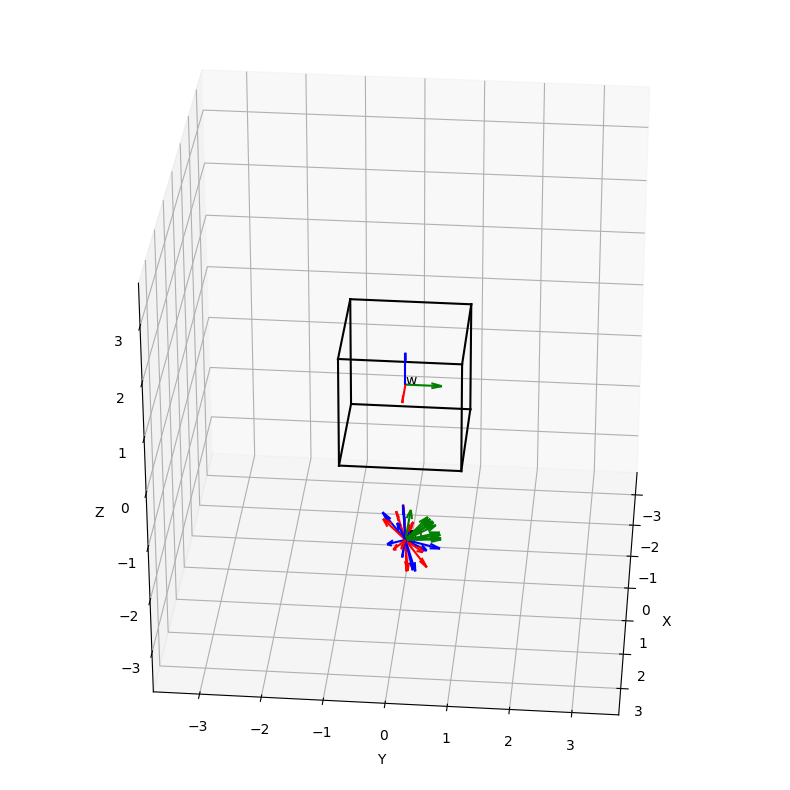

In [13]:
from datasets.visualization.matplotlib import plot_cameras

#import ipywidgets as widgets
# from IPython.display import display

# @widgets.interact(angle=(0, 360))
# def f(angle=5):
plot_cameras(cameras, angle=5)